# Segunda entrega - Preprocesado

**Johnatan Peña Guerra, CC 1063 309 730, Ingeniería Electrica - johnatan.pena@udea.edu.co**  

**Isabella Bedoya Orozco, CC 1001013873, Bioingenieria** - **isabella.bedoyao@udea.edu.co**

**Daniel Barrera Mazo, CC 1045439176, Bioingenieria** - **daniel.barreram@udea.edu.co**

#Dataset

https://www.kaggle.com/competitions/udea-ai4eng-20241/data

# Instalacion de modulos y librerias necesarias

In [ ]:
! pip install kaggle

In [4]:
pip install --upgrade category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 915.0 kB/s eta 0:00:00


In [5]:
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split , KFold
##import local.lib.mlutils
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
%matplotlib inline
import seaborn as sns
import category_encoders as ce


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
os.environ['KAGGLE_CONFIG_DIR'] = '.'
!chmod 600 ./kaggle.json
!kaggle competitions download -c udea-ai4eng-20241
!unzip "udea-ai4eng-20241.zip"
! rm udea-ai4eng-20241.zip test.csv

udea-ai4eng-20241.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  udea-ai4eng-20241.zip
  inflating: submission_example.csv  
  inflating: test.csv                
  inflating: train.csv               


In [6]:
df_train = pd.read_csv('train.csv')
df_train

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,FAMI_TIENEAUTOMOVIL,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET.1,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,Si,N,No,Si,Si,Postgrado,medio-alto
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,No,N,No,Si,No,Técnica o tecnológica incompleta,bajo
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,No,N,No,No,Si,Secundaria (Bachillerato) completa,bajo
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,No,N,No,Si,Si,Secundaria (Bachillerato) completa,alto
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,Si,N,No,Si,Si,Primaria completa,medio-bajo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107697,888285,20203,ADMINISTRACION DE EMPRESAS,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 4,Si,Primaria incompleta,Si,No,N,No,Si,Si,Primaria incompleta,medio-alto
107698,480672,20183,NEGOCIOS INTERNACIONALES,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Entre 11 y 20 horas,Estrato 1,No,Primaria incompleta,Si,No,N,No,No,No,Secundaria (Bachillerato) completa,alto
107699,796021,20212,CONSTRUCCION EN ARQUITECTURA E INGENIERIA,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 2,Si,Secundaria (Bachillerato) incompleta,Si,No,N,Si,Si,Si,Secundaria (Bachillerato) incompleta,bajo
107700,636267,20195,ADMINISTRACION DE EMPRESAS,CAUCA,Entre 500 mil y menos de 1 millón,Más de 30 horas,Estrato 3,Si,Primaria completa,Si,Si,N,Si,Si,Si,Primaria completa,bajo


In [ ]:
df_train.isnull().sum()

ID                                    0
PERIODO                               0
ESTU_PRGM_ACADEMICO                   0
ESTU_PRGM_DEPARTAMENTO                0
ESTU_VALORMATRICULAUNIVERSIDAD     6287
ESTU_HORASSEMANATRABAJA           30857
FAMI_ESTRATOVIVIENDA              32137
FAMI_TIENEINTERNET                26629
FAMI_EDUCACIONPADRE               23178
FAMI_TIENELAVADORA                39773
FAMI_TIENEAUTOMOVIL               43623
ESTU_PRIVADO_LIBERTAD                 0
ESTU_PAGOMATRICULAPROPIO           6498
FAMI_TIENECOMPUTADOR              38103
FAMI_TIENEINTERNET.1              26629
FAMI_EDUCACIONMADRE               23664
RENDIMIENTO_GLOBAL                    0
dtype: int64

In [ ]:
df_train.info() #Muestra la estructura básica del DataFrame, incluyendo la cantidad de filas y columnas, así como los nombres de las columnas y los tipos de datos que contiene.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 692500 entries, 0 to 692499
Data columns (total 17 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   ID                              692500 non-null  int64 
 1   PERIODO                         692500 non-null  int64 
 2   ESTU_PRGM_ACADEMICO             692500 non-null  object
 3   ESTU_PRGM_DEPARTAMENTO          692500 non-null  object
 4   ESTU_VALORMATRICULAUNIVERSIDAD  686213 non-null  object
 5   ESTU_HORASSEMANATRABAJA         661643 non-null  object
 6   FAMI_ESTRATOVIVIENDA            660363 non-null  object
 7   FAMI_TIENEINTERNET              665871 non-null  object
 8   FAMI_EDUCACIONPADRE             669322 non-null  object
 9   FAMI_TIENELAVADORA              652727 non-null  object
 10  FAMI_TIENEAUTOMOVIL             648877 non-null  object
 11  ESTU_PRIVADO_LIBERTAD           692500 non-null  object
 12  ESTU_PAGOMATRICULAPROPIO      

In [ ]:
def variables_binarias(df) :
  """ Convertir Variables Binarias """
  df['FAMI_TIENEINTERNET'] = df['FAMI_TIENEINTERNET'].replace({'Si': 1, 'No':0})
  df['FAMI_TIENEINTERNET.1'] = df['FAMI_TIENEINTERNET.1'].replace({'Si': 1, 'No':0})
  df['FAMI_TIENELAVADORA'] = df['FAMI_TIENELAVADORA'].replace({'Si': 1, 'No':0})
  df['FAMI_TIENEAUTOMOVIL'] = df['FAMI_TIENEAUTOMOVIL'].replace({'Si': 1, 'No':0})
  df['ESTU_PAGOMATRICULAPROPIO'] = df['ESTU_PAGOMATRICULAPROPIO'].replace({'Si': 1, 'No':0})
  df['FAMI_TIENECOMPUTADOR'] = df['FAMI_TIENECOMPUTADOR'].replace({'Si': 1, 'No':0})
  df['ESTU_PRIVADO_LIBERTAD'] = df['ESTU_PRIVADO_LIBERTAD'].replace({'S': 1, 'N':0})
  df['FAMI_ESTRATOVIVIENDA'] = df['FAMI_ESTRATOVIVIENDA'].replace({'Sin Estrato': 0, 'Estrato 1':1, 'Estrato 2':2, 'Estrato 3':3, 'Estrato 4':4, 'Estrato 5':5, 'Estrato 6':6})
  df['ESTU_HORASSEMANATRABAJA'] = df['ESTU_HORASSEMANATRABAJA'].replace({'0': 0, 'Menos de 10 horas':1, 'Entre 11 y 20 horas':2, 'Entre 21 y 30 horas':3, 'Más de 30 horas':4})
  df['ESTU_VALORMATRICULAUNIVERSIDAD'] = df['ESTU_VALORMATRICULAUNIVERSIDAD'].replace({'No pagó matrícula': 0, 'Menos de 500 mil':0.5, 'Entre 500 mil y menos de 1 millón':1, 'Entre 1 millón y menos de 2.5 millones':2.5, 'Entre 2.5 millones y menos de 4 millones':4, 'Entre 4 millones y menos de 5.5 millones':5.5, 'Entre 5.5 millones y menos de 7 millones':7, 'Más de 7 millones':8})
  df['RENDIMIENTO_GLOBAL'] = df['RENDIMIENTO_GLOBAL'].replace({'bajo': 1, 'medio-bajo':2, 'medio-alto':3, 'alto':4})
  return df

In [ ]:
df_train = variables_binarias(df_train)
df_train

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,FAMI_TIENEAUTOMOVIL,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET.1,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL
0,904256,20212,ENFERMERIA,BOGOTÁ,7.0,1.0,3.0,1.0,Técnica o tecnológica incompleta,1.0,1.0,0,0.0,1.0,1.0,Postgrado,3
1,645256,20212,DERECHO,ATLANTICO,4.0,0.0,3.0,0.0,Técnica o tecnológica completa,1.0,0.0,0,0.0,1.0,0.0,Técnica o tecnológica incompleta,1
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,4.0,4.0,3.0,1.0,Secundaria (Bachillerato) completa,1.0,0.0,0,0.0,0.0,1.0,Secundaria (Bachillerato) completa,1
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,5.5,0.0,4.0,1.0,No sabe,1.0,0.0,0,0.0,1.0,1.0,Secundaria (Bachillerato) completa,4
4,989032,20212,PSICOLOGIA,ANTIOQUIA,4.0,3.0,3.0,1.0,Primaria completa,1.0,1.0,0,0.0,1.0,1.0,Primaria completa,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692495,25096,20195,BIOLOGIA,LA GUAJIRA,1.0,2.0,2.0,1.0,Secundaria (Bachillerato) completa,1.0,0.0,0,1.0,1.0,1.0,Secundaria (Bachillerato) incompleta,3
692496,754213,20212,PSICOLOGIA,NORTE SANTANDER,4.0,4.0,3.0,1.0,Primaria incompleta,1.0,0.0,0,0.0,1.0,1.0,Secundaria (Bachillerato) incompleta,1
692497,504185,20183,ADMINISTRACIÓN EN SALUD OCUPACIONAL,BOGOTÁ,2.5,1.0,3.0,1.0,Secundaria (Bachillerato) completa,1.0,0.0,0,1.0,1.0,1.0,Secundaria (Bachillerato) incompleta,2
692498,986620,20195,PSICOLOGIA,TOLIMA,4.0,1.0,1.0,0.0,Primaria completa,0.0,0.0,0,1.0,1.0,0.0,Primaria completa,1


In [ ]:
#Calcular estadísticas descriptivas básicas sobre las columnas numéricas en tu DataFrame, como la media, la mediana, la desviación estándar, etc.
df_train._get_numeric_data().describe().T

,count,mean,std,min,25%,50%,75%,max
ID,692500.0,494606.130576,285585.209455,1.0,247324.75,494564.5,741782.5,989286.0
PERIODO,692500.0,20198.366679,10.535037,20183.0,20195.00,20195.0,20203.0,20213.0
ESTU_VALORMATRICULAUNIVERSIDAD,686213.0,3.519684,1.803180,0.0,2.00,3.0,5.0,7.0
ESTU_HORASSEMANATRABAJA,661643.0,2.409747,1.521863,0.0,1.00,3.0,4.0,4.0
FAMI_ESTRATOVIVIENDA,660363.0,2.521513,1.122754,0.0,2.00,2.0,3.0,6.0
FAMI_TIENEINTERNET,665871.0,0.889833,0.313098,0.0,1.00,1.0,1.0,1.0
FAMI_TIENELAVADORA,652727.0,0.863133,0.343707,0.0,1.00,1.0,1.0,1.0
FAMI_TIENEAUTOMOVIL,648877.0,0.364123,0.481184,0.0,0.00,0.0,1.0,1.0
ESTU_PRIVADO_LIBERTAD,692500.0,0.000049,0.007007,0.0,0.00,0.0,0.0,1.0
ESTU_PAGOMATRICULAPROPIO,686002.0,0.442857,0.496724,0.0,0.00,0.0,1.0,1.0


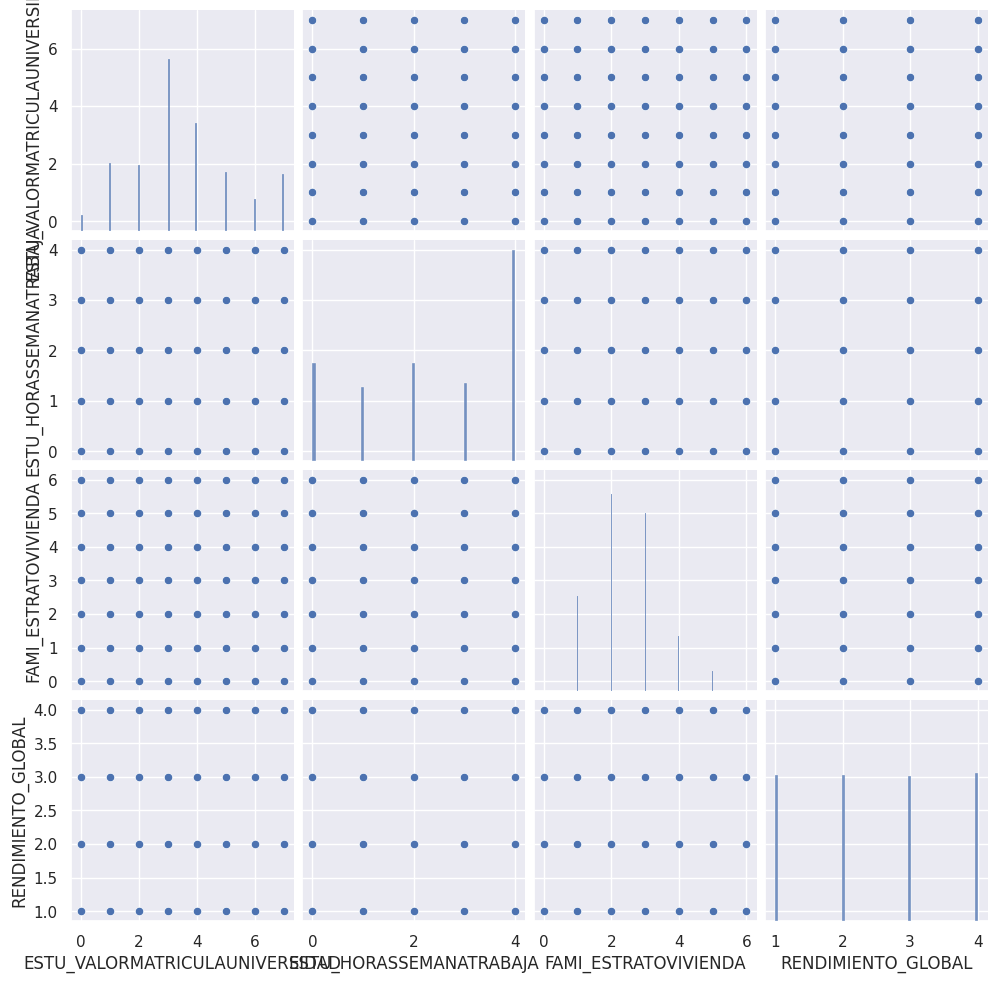

In [ ]:
cols = ['ESTU_VALORMATRICULAUNIVERSIDAD', 'ESTU_HORASSEMANATRABAJA', 'FAMI_ESTRATOVIVIENDA', 'RENDIMIENTO_GLOBAL']
##cols =  np.unique(list(df_train._get_numeric_data().columns))
sns.set()
sns.pairplot(df_train[cols])


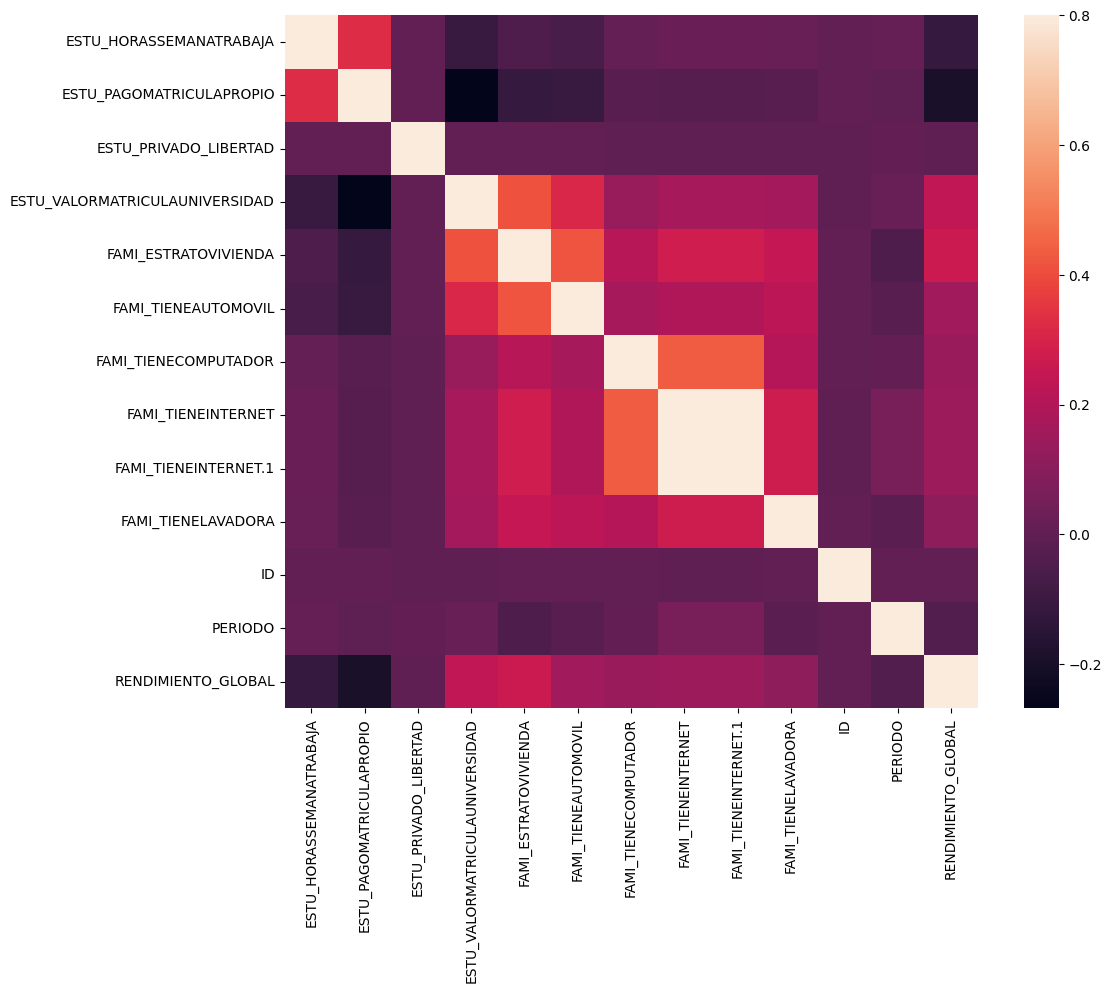

In [ ]:
#correlation matrix
##cols = ['ESTU_VALORMATRICULAUNIVERSIDAD', 'ESTU_HORASSEMANATRABAJA', 'FAMI_ESTRATOVIVIENDA', 'RENDIMIENTO_GLOBAL']
cols =  np.unique(list(df_train._get_numeric_data().columns))

corrmat = df_train[cols].corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

## **Variables Categóricas**


In [ ]:
##ccols = [i for i in df_train.columns if not i in df_train._get_numeric_data()]
ccols = ['ESTU_PRGM_ACADEMICO', 'ESTU_PRGM_DEPARTAMENTO','FAMI_EDUCACIONPADRE','FAMI_EDUCACIONMADRE']
for c in ccols:
    print ("%30s"%c, np.unique(df_train[c].dropna()))



           ESTU_PRGM_ACADEMICO ['3°  CICLO PROFESIONAL NEGOCIOS INTERNACIONALES'
 'ACTIVIDAD FISICA Y DEPORTE' 'ACUICULTURA' 'ADMINISTRACION'
 'ADMINISTRACION  FINANCIERA' 'ADMINISTRACION & SERVICIO'
 'ADMINISTRACION AERONAUTICA' 'ADMINISTRACION AGROPECUARIA'
 'ADMINISTRACION AMBIENTAL'
 'ADMINISTRACION AMBIENTAL Y DE LOS RECURSOS NATURALES'
 'ADMINISTRACION BANCARIA Y FINANCIERA' 'ADMINISTRACION COMERCIAL'
 'ADMINISTRACION COMERCIAL Y DE MERCADEO'
 'ADMINISTRACION DE COMERCIO EXTERIOR' 'ADMINISTRACION DE EMPRESAS'
 'ADMINISTRACION DE EMPRESAS  Y  GESTION AMBIENTAL'
 'ADMINISTRACION DE EMPRESAS AGROINDUSTRIALES'
 'ADMINISTRACION DE EMPRESAS AGROPECUARIAS'
 'ADMINISTRACION DE EMPRESAS COMERCIALES'
 'ADMINISTRACION DE EMPRESAS EN TELECOMUNICACIONES'
 'ADMINISTRACION DE EMPRESAS TURISTICA'
 'ADMINISTRACION DE EMPRESAS TURISTICAS'
 'ADMINISTRACION DE EMPRESAS TURISTICAS Y HOTELERAS'
 'ADMINISTRACION DE EMPRESAS TURÍSTICAS Y HOTELERAS'
 'ADMINISTRACION DE EMPRESAS Y FINANZAS'
 'ADMINISTRACI

In [ ]:
c="ESTU_PRGM_ACADEMICO"
df_train[c].value_counts()

ESTU_PRGM_ACADEMICO
DERECHO                                                   53244
ADMINISTRACION DE EMPRESAS                                51902
CONTADURIA PUBLICA                                        39664
PSICOLOGIA                                                31932
INGENIERIA INDUSTRIAL                                     28481
                                                          ...  
LICENCIATURA EN ESPAÑOL Y FILOLOGÍA                           1
ADMINISTRACION EN NEGOCIOS INTERNACIONALES                    1
ADMINISTRACION DE COMERCIO EXTERIOR                           1
LICENCIATURA EN EDUCACI¿N F¿SICA RECREACI¿N Y DEPORTES        1
PROFESIONAL EN INVESTIGACIÓN CRIMINAL                         1
Name: count, Length: 948, dtype: int64

### Entender Valores NaN

In [ ]:
## KEEPOUTPUT
k, f = df_train.isna().sum(), (df_train.isna().sum() / df_train.count())*100
k[k!=0], f[k!=0]

(ESTU_VALORMATRICULAUNIVERSIDAD     6287
 ESTU_HORASSEMANATRABAJA           30857
 FAMI_ESTRATOVIVIENDA              32137
 FAMI_TIENEINTERNET                26629
 FAMI_EDUCACIONPADRE               23178
 FAMI_TIENELAVADORA                39773
 FAMI_TIENEAUTOMOVIL               43623
 ESTU_PAGOMATRICULAPROPIO           6498
 FAMI_TIENECOMPUTADOR              38103
 FAMI_TIENEINTERNET.1              26629
 FAMI_EDUCACIONMADRE               23664
 dtype: int64,
 ESTU_VALORMATRICULAUNIVERSIDAD    0.916188
 ESTU_HORASSEMANATRABAJA           4.663693
 FAMI_ESTRATOVIVIENDA              4.866566
 FAMI_TIENEINTERNET                3.999123
 FAMI_EDUCACIONPADRE               3.462907
 FAMI_TIENELAVADORA                6.093359
 FAMI_TIENEAUTOMOVIL               6.722846
 ESTU_PAGOMATRICULAPROPIO          0.947228
 FAMI_TIENECOMPUTADOR              5.822612
 FAMI_TIENEINTERNET.1              3.999123
 FAMI_EDUCACIONMADRE               3.538087
 dtype: float64)

In [7]:
df_train.columns

Index(['ID', 'PERIODO', 'ESTU_PRGM_ACADEMICO', 'ESTU_PRGM_DEPARTAMENTO',
       'ESTU_VALORMATRICULAUNIVERSIDAD', 'ESTU_HORASSEMANATRABAJA',
       'FAMI_ESTRATOVIVIENDA', 'FAMI_TIENEINTERNET', 'FAMI_EDUCACIONPADRE',
       'FAMI_TIENELAVADORA', 'FAMI_TIENEAUTOMOVIL', 'ESTU_PRIVADO_LIBERTAD',
       'ESTU_PAGOMATRICULAPROPIO', 'FAMI_TIENECOMPUTADOR',
       'FAMI_TIENEINTERNET.1', 'FAMI_EDUCACIONMADRE', 'RENDIMIENTO_GLOBAL'],
      dtype='object')

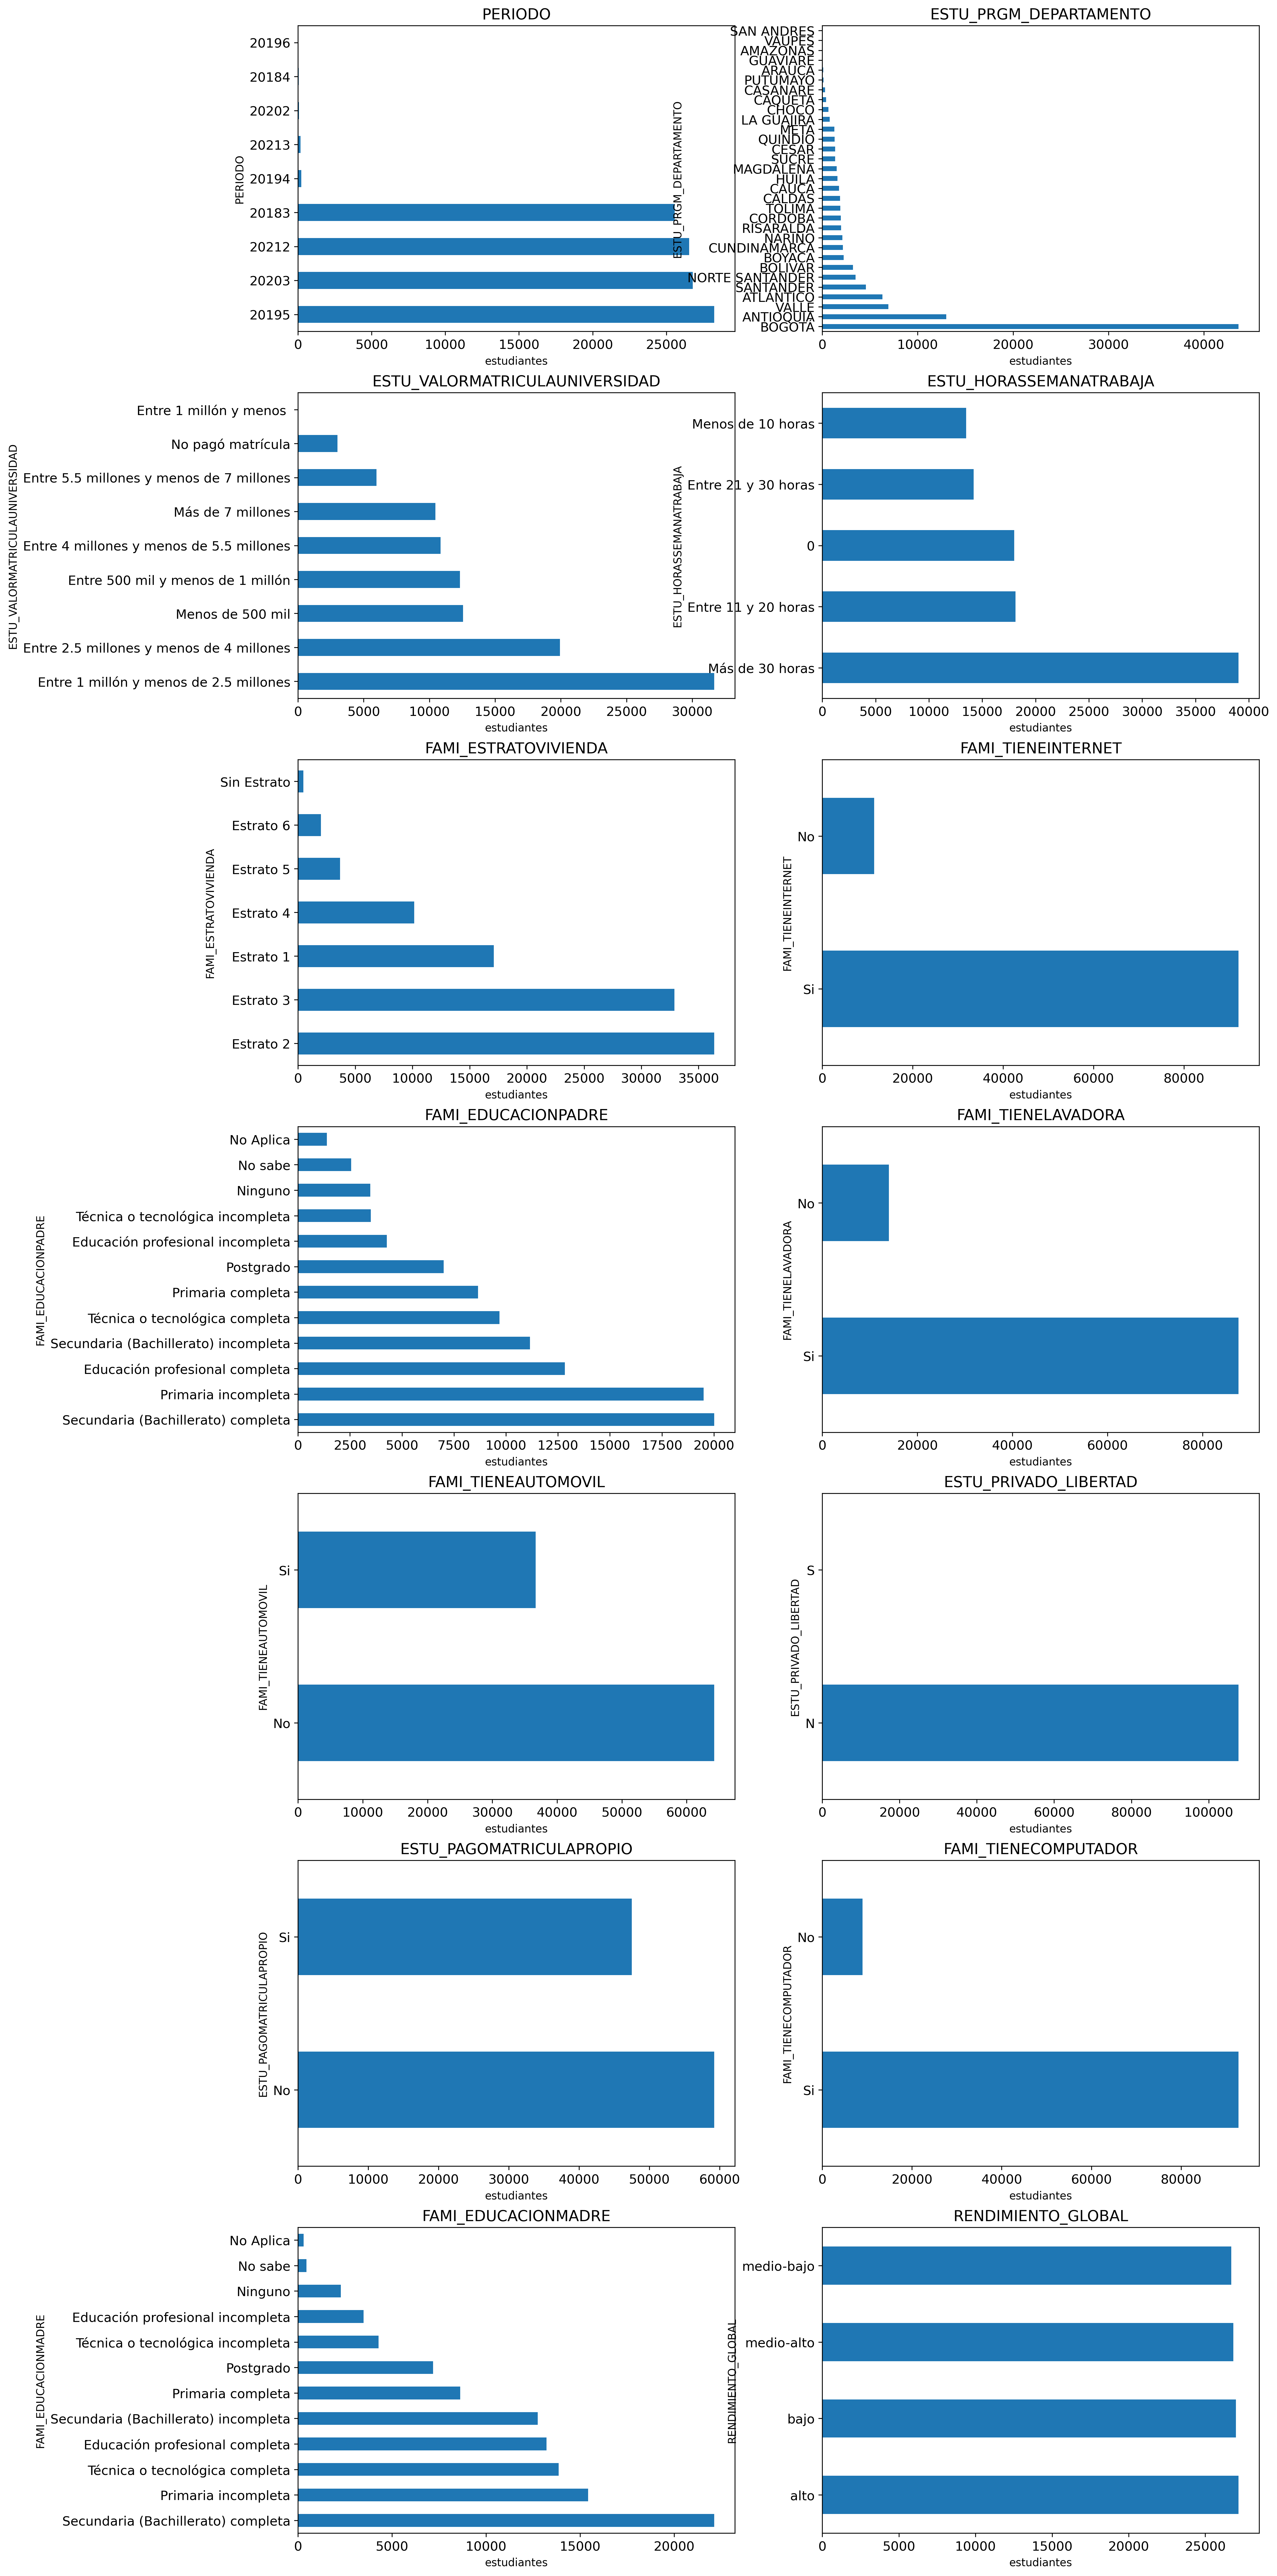

In [9]:
# Se eliminan las variables ya graficadas

estu_cat_graf= df_train

# Se organiza los indices del dataframe para el grafico.

estu_cat_graf = estu_cat_graf.iloc[:,[1,3,4,5,6,7,8,9,10,11,12,13,15,16]]

def graficos_eda_cat(cat):

    #Calculamos el número de filas que necesitamos
    from math import ceil
    filas = ceil(cat.shape[1] / 2)

    #Definimos el gráfico
    f, ax = plt.subplots(nrows = filas, ncols = 2, figsize = (16, filas * 6),dpi=300)

    #Aplanamos para iterar por el gráfico como si fuera de 1 dimensión en lugar de 2
    ax = ax.flat


    for a, variable in enumerate(cat):
        cat[variable].value_counts().plot.barh(ax = ax[a])
        ax[a].set_title(variable, fontsize = 14)
        ax[a].tick_params(labelsize = 12)
        ax[a].set_xlabel('estudiantes')

graficos_eda_cat(estu_cat_graf)

In [ ]:
a  = df_train[df_train.isna().any(axis=1)].reset_index()
a

,index,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,FAMI_TIENEAUTOMOVIL,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET.1,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL
0,21,284373,20195,INGENIERIA MECATRONICA,VALLE,6.0,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0,NaN,NaN,NaN,2
1,26,925456,20195,DERECHO,BOLIVAR,4.0,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0,NaN,NaN,NaN,2
2,32,347946,20212,DERECHO,SUCRE,4.0,0.0,2.0,1.0,Educación profesional incompleta,NaN,NaN,0,0.0,NaN,1.0,Técnica o tecnológica completa,3
3,48,527489,20195,INGENIERIA MECATRONICA,BOGOTÁ,5.0,NaN,3.0,NaN,Secundaria (Bachillerato) completa,NaN,NaN,0,1.0,NaN,NaN,Técnica o tecnológica completa,1
4,49,836859,20195,LICENCIATURA EN CIENCIAS SOCIALES,BOGOTÁ,3.0,NaN,NaN,NaN,NaN,NaN,NaN,0,1.0,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63599,692444,763147,20183,OPTOMETRIA,BOGOTÁ,5.0,NaN,NaN,NaN,Primaria completa,NaN,NaN,0,0.0,NaN,NaN,Secundaria (Bachillerato) incompleta,1
63600,692448,54207,20183,PSICOLOGIA,TOLIMA,3.0,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0,NaN,NaN,NaN,1
63601,692454,821212,20195,ADMINISTRACION PUBLICA TERRITORIAL,BOGOTÁ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,1
63602,692464,592258,20183,FILOLOGIA E IDIOMAS,BOGOTÁ,2.0,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0,NaN,NaN,NaN,4


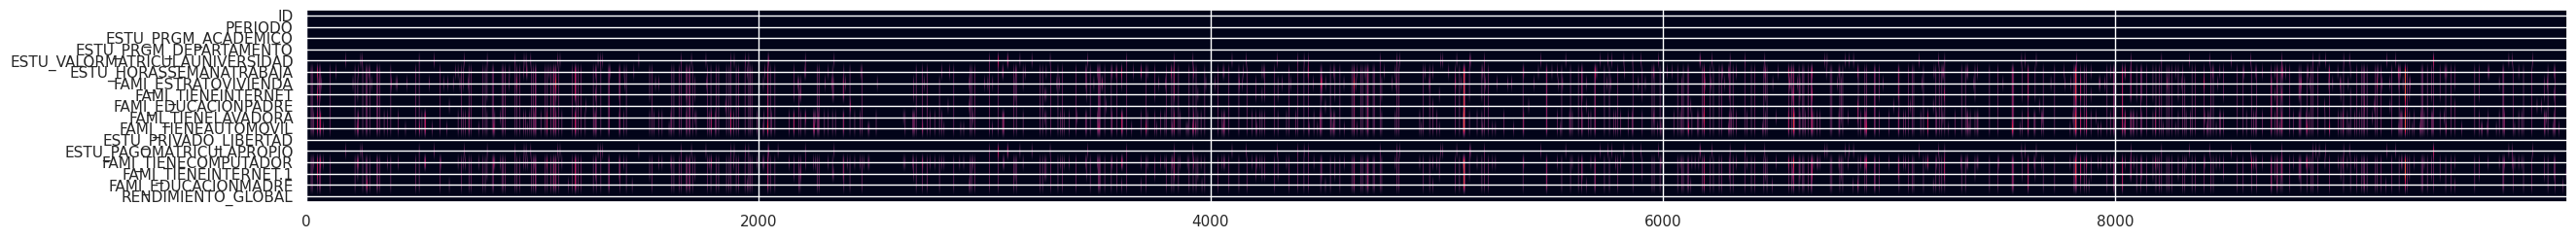

In [ ]:
##df_graf_1 = df_train[df_train.isna().any(axis=1)].reset_index(drop=True)
df_graf_1 = df_train.reset_index(drop=True)
df_graf = df_graf_1.iloc[:10000]

ax = plt.figure(figsize=(30,15)).add_subplot(111)
ax.imshow(df_graf.isna().values.T)
ax.set_aspect(50)
plt.yticks(range(df_graf.shape[1]),df_graf.columns);

### **Organizar Datos**

In [ ]:
def variables_binarias(df) :
  """ Convertir Variables Binarias """
  df['FAMI_TIENEINTERNET'] = df['FAMI_TIENEINTERNET'].replace({'Si': 1, 'No':0})
  df['FAMI_TIENELAVADORA'] = df['FAMI_TIENELAVADORA'].replace({'Si': 1, 'No':0})
  df['FAMI_TIENEAUTOMOVIL'] = df['FAMI_TIENEAUTOMOVIL'].replace({'Si': 1, 'No':0})
  df['ESTU_PAGOMATRICULAPROPIO'] = df['ESTU_PAGOMATRICULAPROPIO'].replace({'Si': 1, 'No':0})
  df['FAMI_TIENECOMPUTADOR'] = df['FAMI_TIENECOMPUTADOR'].replace({'Si': 1, 'No':0})
  df['ESTU_PRIVADO_LIBERTAD'] = df['ESTU_PRIVADO_LIBERTAD'].replace({'S': 1, 'N':0})
  ##df['FAMI_ESTRATOVIVIENDA'] = df['FAMI_ESTRATOVIVIENDA'].replace({'Sin Estrato': 0, 'Estrato 1':1, 'Estrato 2':2, 'Estrato 3':3, 'Estrato 4':4, 'Estrato 5':5, 'Estrato 6':6})

  ##df['RENDIMIENTO_GLOBAL'] = df['RENDIMIENTO_GLOBAL'].replace({'bajo': 1, 'medio-bajo':2, 'medio-alto':3, 'alto':4})
  return df

In [ ]:
def normalizar_data (df):

  columnas = ['ESTU_HORASSEMANATRABAJA','ESTU_VALORMATRICULAUNIVERSIDAD']
  scaler = MinMaxScaler()
  df_normalizado = scaler.fit_transform(df[columnas])
  df_final = pd.DataFrame(df_normalizado, columns = columnas)
  df[columnas] = df_final[columnas]
  return df

In [ ]:
#Representación numérica de una variable categórica
def to_onehot(x):
    values = np.unique(x)
    r = np.r_[[np.argwhere(i==values)[0][0] for i in x]]
    return np.eye(len(values))[r].astype(int)

In [ ]:
def replace_columns_with_onehot(d, col):
    k = to_onehot(d[col].values)
    r = pd.DataFrame(k, columns=["%s_%d"%(col, i) for i in range(k.shape[1])], index=d.index).join(d)
    del(r[col])
    return r

In [ ]:
def target_encoding_train (df_train, df_test):
  df = df_train
  column_x = ['ESTU_PRGM_ACADEMICO']
  x_train = df_train.drop('RENDIMIENTO_GLOBAL', axis=1)
  y_train = df_train['RENDIMIENTO_GLOBAL'].replace({'bajo': 1, 'medio-bajo':2, 'medio-alto':3, 'alto':4})
  x_test = df_test
  encoder = ce.TargetEncoder(cols=['ESTU_PRGM_ACADEMICO'])
  x_train_encode = encoder.fit_transform(x_train,y_train)
  x_test_encode = encoder.transform(x_test)
  df['ESTU_PRGM_ACADEMICO'] = x_train_encode['ESTU_PRGM_ACADEMICO']




    ##encoder.fit(x_train,y_train)
    ##df_encoded[test_idx] = encoder.transform(x_test)['ESTU_PRGM_ACADEMICO']
    ##df_final = pd.DataFrame(df_encoded, columns = column_x)
    ##df[column_x] = df_final[column_x]
  return df,x_test_encode

In [ ]:
def clean_data(d):



  d = d.drop("ID", axis=1)
  d = d.drop("PERIODO", axis=1)
  d = d.drop("FAMI_TIENEINTERNET.1", axis=1)
  d['ESTU_HORASSEMANATRABAJA'] = d['ESTU_HORASSEMANATRABAJA'].replace({'0': 0, 'Menos de 10 horas':1, 'Entre 11 y 20 horas':2, 'Entre 21 y 30 horas':3, 'Más de 30 horas':4})
  d['ESTU_VALORMATRICULAUNIVERSIDAD'] = d['ESTU_VALORMATRICULAUNIVERSIDAD'].replace({'No pagó matrícula': 0, 'Menos de 500 mil':0.5, 'Entre 500 mil y menos de 1 millón':1, 'Entre 1 millón y menos de 2.5 millones':2.5, 'Entre 2.5 millones y menos de 4 millones':4, 'Entre 4 millones y menos de 5.5 millones':5.5, 'Entre 5.5 millones y menos de 7 millones':7, 'Más de 7 millones':8})

  d['FAMI_TIENEINTERNET'] = d.FAMI_TIENEINTERNET.fillna("Si")
  d['FAMI_TIENELAVADORA'] = d.FAMI_TIENELAVADORA.fillna("Si")
  d['FAMI_TIENEAUTOMOVIL'] = d.FAMI_TIENEAUTOMOVIL.fillna("No")
  d['ESTU_PAGOMATRICULAPROPIO'] = d.ESTU_PAGOMATRICULAPROPIO.fillna("No")
  d['FAMI_TIENECOMPUTADOR'] = d.FAMI_TIENECOMPUTADOR.fillna("Si")
  d['ESTU_PRIVADO_LIBERTAD'] = d.ESTU_PRIVADO_LIBERTAD.fillna("N")


  d['FAMI_EDUCACIONPADRE'] = d.FAMI_EDUCACIONPADRE.fillna("N")
  d['FAMI_EDUCACIONMADRE'] = d.FAMI_EDUCACIONMADRE.fillna("N")
  d['ESTU_PRGM_DEPARTAMENTO'] = d.ESTU_PRGM_DEPARTAMENTO.fillna("N")
  d['FAMI_ESTRATOVIVIENDA'] = d.FAMI_ESTRATOVIVIENDA.fillna("N")

  d["ESTU_VALORMATRICULAUNIVERSIDAD"]  = d.ESTU_VALORMATRICULAUNIVERSIDAD.fillna(d.ESTU_VALORMATRICULAUNIVERSIDAD.mean())
  d["ESTU_HORASSEMANATRABAJA"]  = d.ESTU_HORASSEMANATRABAJA.fillna(d.ESTU_HORASSEMANATRABAJA.mean())


  ##d = d.dropna().reset_index()
  d = variables_binarias(d)
  d = normalizar_data (d)
  ##d = target_encoding (d)
  d = replace_columns_with_onehot(d, "FAMI_EDUCACIONPADRE")
  d = replace_columns_with_onehot(d, "FAMI_EDUCACIONMADRE")
  d = replace_columns_with_onehot(d, "ESTU_PRGM_DEPARTAMENTO")
  d = replace_columns_with_onehot(d, "FAMI_ESTRATOVIVIENDA")
  return d



### **Transformar el data test y train**

In [ ]:
dtr = pd.read_csv("train.csv")
dts = pd.read_csv("test.csv")
lentr = len(dtr)
dtr.shape, dts.shape

((692500, 17), (296786, 16))

In [ ]:
enco = target_encoding_train (dtr,dts)
df_train_encoded = pd.DataFrame(enco[0])
df_test_encoded = pd.DataFrame(enco[1])


d_train_clean = clean_data(df_train_encoded)
d_test_clean = clean_data(df_test_encoded)

source_cols = [i for i in d_train_clean.columns if i!="RENDIMIENTO_GLOBAL"]

Xtr, ytr = d_train_clean[source_cols].values, d_train_clean["RENDIMIENTO_GLOBAL"].values
Xts      = d_test_clean.values

print (Xtr.shape, ytr.shape)
print (Xts.shape)

(692500, 74) (692500,)
(296786, 74)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier()
print (cross_val_score(rf, Xtr, ytr))

svc = SVC()
print (cross_val_score(svc, Xtr, ytr))

[0.38855596 0.38722022 0.38636101 0.38769675 0.38729964]


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier()
rf.fit(Xtr, ytr)
preds_ts = rf.predict(Xts)
preds_ts



array(['medio-alto', 'medio-bajo', 'alto', ..., 'medio-alto', 'alto',
       'alto'], dtype=object)

In [ ]:
submission = pd.DataFrame([dts.ID, pd.Series(preds_ts, name="RENDIMIENTO_GLOBAL")]).T
submission

,ID,RENDIMIENTO_GLOBAL
0,550236,medio-alto
1,98545,medio-bajo
2,499179,alto
3,782980,bajo
4,785185,bajo
...,...,...
296781,496981,medio-alto
296782,209415,alto
296783,239074,medio-alto
296784,963852,alto


In [ ]:
submission.to_csv("submission_kaggle.csv", index=False)

NameError: name 'estu_cat_graf' is not defined